In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

### LOGISTIC REGRESSION CLASS CREATION

-----


In [2]:
class Logistic_regression():

    def __init__(self, dataframe, response_variable, title_dataframe):

        self.dataframe = dataframe
        self.response_variable = response_variable
        self.title_dataframe = title_dataframe


    def fit_model(self):

        X = self.dataframe.drop(self.response_variable, axis = 1)
        y = self.dataframe[self.response_variable]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        self.log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

        self.log_reg.fit(self.x_train, self.y_train)

        self.y_pred_train = self.log_reg.predict(self.x_train)
        self.y_pred_test = self.log_reg.predict(self.x_test)


    def print_confusion_matrix(self):

        mat_lr1 = confusion_matrix(self.y_test, self.y_pred_test)

        my_heatmap_palette = LinearSegmentedColormap.from_list('Gradient', ['lightcyan', 'mediumturquoise', 'teal'], N=1000)

        plt.figure(figsize = (6, 6))
        sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = my_heatmap_palette)

        plt.title(f'{self.title_dataframe.upper()} CONFUSION MATRIX', fontsize = 12, color = 'darkslategray', fontweight = "bold")
        plt.xlabel('Predicted Value')
        plt.ylabel('Actual Value')
        plt.show()


    def get_metrics(self, model_name):
        
        accuracy_test = accuracy_score(self.y_test, self.y_pred_test)
        precision_test = precision_score(self.y_test, self.y_pred_test)
        recall_test = recall_score(self.y_test, self.y_pred_test)
        f1_test = f1_score(self.y_test, self.y_pred_test)
        kappa_test = cohen_kappa_score(self.y_test, self.y_pred_test)

        accuracy_train = accuracy_score(self.y_train, self.y_pred_train)
        precision_train = precision_score(self.y_train, self.y_pred_train)
        recall_train = recall_score(self.y_train, self.y_pred_train)
        f1_train = f1_score(self.y_train, self.y_pred_train)
        kappa_train = cohen_kappa_score(self.y_train, self.y_pred_train)
            
        dataframe = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                            'precision': [precision_test, precision_train],
                            'recall': [recall_test, recall_train], 
                            'f1': [f1_test, f1_train],
                            'kappa': [kappa_test, kappa_train],
                            'set': ['test', 'train']})
        
        dataframe['model'] = model_name

        return dataframe   
    

    def create_df_feature_importance(self):

        coefficients = self.log_reg.coef_[0]

        self.predictors_sig_dataframe = pd.DataFrame({'predictor': self.x_train.columns, 'coeficiente': coefficients})

        self.predictors_sig_dataframe['importance'] = abs(self.predictors_sig_dataframe['coeficiente'])
        self.predictors_sig_dataframe.sort_values(by='importance', ascending=False, inplace=True)

        return self.predictors_sig_dataframe


    def create_barplot_feature_importance(self):

        my_barplot_palette = LinearSegmentedColormap.from_list('Gradient', ['teal', 'mediumturquoise', 'paleturquoise'])
        num_bars = (len(self.dataframe.columns) -1)

        plt.figure(figsize=(10,6))
        sns.barplot(x = 'importance', y = 'predictor', data = self.predictors_sig_dataframe, palette= my_barplot_palette(np.linspace(0, 1, num_bars)))
        plt.title(f'{self.title_dataframe.upper()} LOGISTIC REGRESSION FEATURE IMPORTANCE', fontsize = 12, color = 'darkslategray', fontweight = 'bold')
        plt.show()

### LOGISTIC REGRESSION ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [3]:
df_over = pd.read_pickle('../data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [4]:
response_var = 'TenYearCHD'

In [5]:
title_df_over = 'over_sample'

In [6]:
log_regression_over = Logistic_regression(df_over, response_var, title_df_over)

In [7]:
log_regression_over.fit_model()

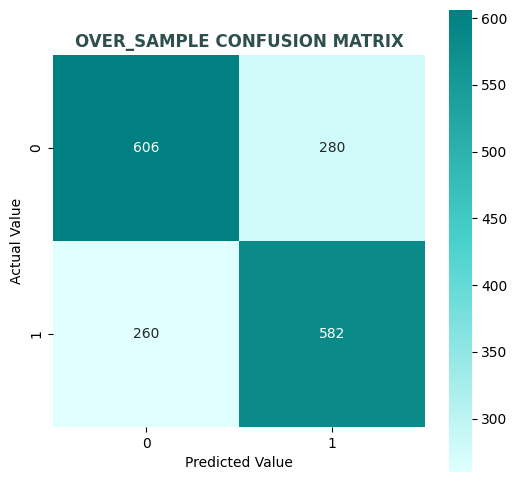

In [8]:
log_regression_over.print_confusion_matrix()

In [9]:
lr_over_results = log_regression_over.get_metrics('OVER Logistic Regression')
lr_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.687500,0.675174,0.691211,0.683099,0.374963,test,OVER Logistic Regression
1,0.654342,0.655556,0.666176,0.660823,0.308479,train,OVER Logistic Regression


In [10]:
log_regression_over.create_df_feature_importance()

,predictor,coeficiente,importance
6,age,0.981521,0.981521
1,BMI_category,0.842608,0.842608
7,cigsPerDay,0.407591,0.407591
3,prevalentStroke,0.304683,0.304683
9,sysBP,0.281604,0.281604
10,BMI,-0.151198,0.151198
4,prevalentHyp,0.144997,0.144997
18,sex_M,0.143885,0.143885
17,sex_F,-0.143588,0.143588
8,totChol,0.136958,0.136958


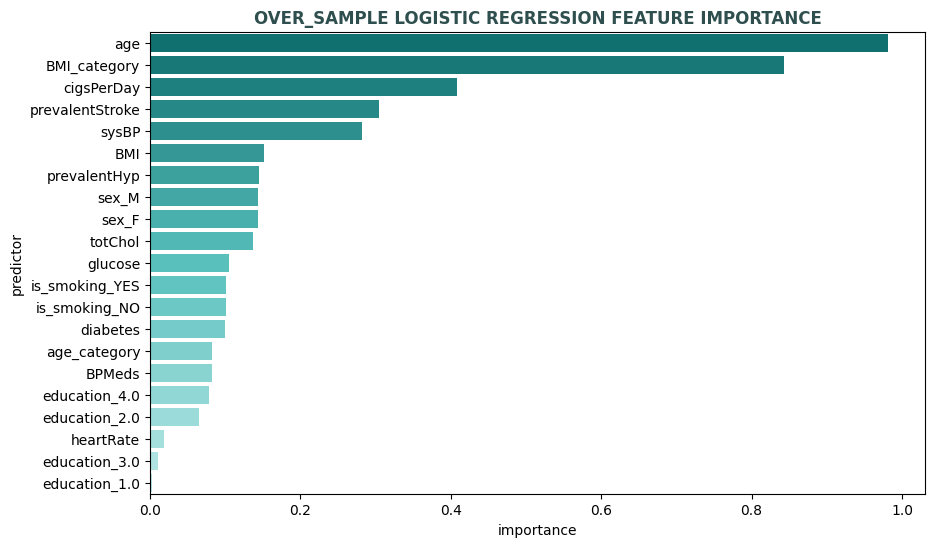

In [11]:
log_regression_over.create_barplot_feature_importance()

###  LOGISTIC REGRESSION  ON TOKEN_SMOTE DATAFRAME

-----


In [12]:
df_ts = pd.read_pickle('../data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
title_df_ts = 'token smote'

In [14]:
log_regression_ts = Logistic_regression(df_ts, response_var, title_df_ts)

In [15]:
log_regression_ts.fit_model()

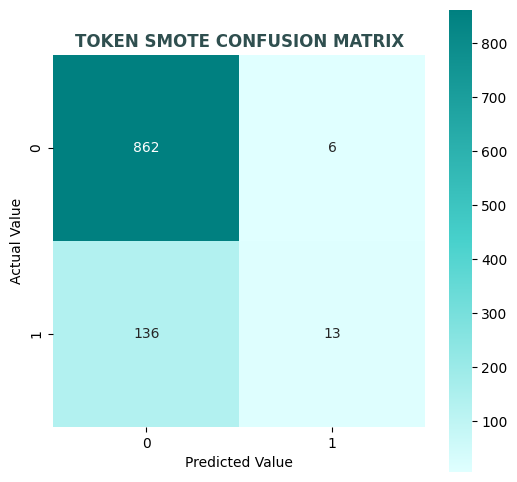

In [16]:
log_regression_ts.print_confusion_matrix()

In [17]:
lr_ts_results = log_regression_ts.get_metrics('TS Logistic Regression')
lr_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [18]:
log_regression_ts.create_df_feature_importance()

,predictor,coeficiente,importance
6,age,0.876989,0.876989
1,BMI_category,0.593927,0.593927
7,cigsPerDay,0.502335,0.502335
3,prevalentStroke,0.432341,0.432341
9,sysBP,0.387356,0.387356
18,sex_M,0.242115,0.242115
17,sex_F,-0.241760,0.241760
12,glucose,0.143731,0.143731
14,education_2.0,-0.142728,0.142728
10,BMI,-0.137898,0.137898


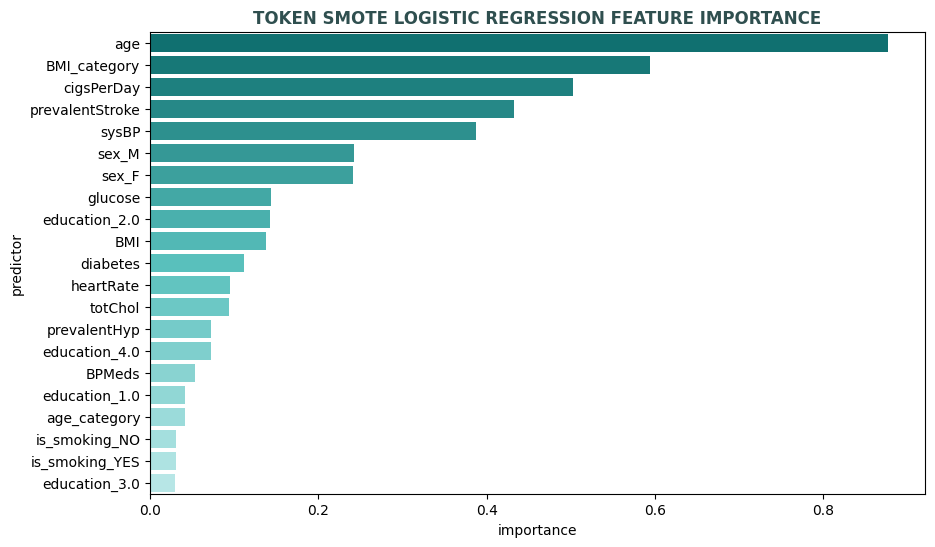

In [19]:
log_regression_ts.create_barplot_feature_importance()

### SAVE RESULTS

-----

In [20]:
all_results = pd.concat([lr_over_results, lr_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.687500,0.675174,0.691211,0.683099,0.374963,test,OVER Logistic Regression
1,0.654342,0.655556,0.666176,0.660823,0.308479,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [21]:
all_results.to_pickle('../data/LR_results.pkl')